<a href="https://colab.research.google.com/github/trevinofernando/Algorithms-for-Machine-Learning/blob/master/HW1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

##Data retrival

In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']

dataframe = pd.read_csv(url, names = header)
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Randomize Suffling Dataset

In [41]:
#shuffle dataframe in place
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,6.4,2.8,5.6,2.1,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.7,2.8,4.1,1.3,Iris-versicolor
3,6.6,2.9,4.6,1.3,Iris-versicolor
4,5.2,3.5,1.5,0.2,Iris-setosa


##Counting classes in dataset

In [42]:
dataframe.iris_class.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: iris_class, dtype: int64

##Minmums and Maximums

###Sepal

In [43]:
print("Min sepal_length = {} in.".format(dataframe.sepal_length.min()))
print("Max sepal_length = {} in.".format(dataframe.sepal_length.max()))
print("Min sepal_width = {} in.".format(dataframe.sepal_width.min()))
print("Max sepal_width = {} in.".format(dataframe.sepal_width.max()))

Min sepal_length = 4.3 in.
Max sepal_length = 7.9 in.
Min sepal_width = 2.0 in.
Max sepal_width = 4.4 in.


###Petal

In [44]:
print("Min petal_length = {} in.".format(dataframe.petal_length.min()))
print("Max petal_length = {} in.".format(dataframe.petal_length.max()))
print("Min petal_width = {} in.".format(dataframe.petal_width.min()))
print("Max petal_width = {} in.".format(dataframe.petal_width.max()))

Min petal_length = 1.0 in.
Max petal_length = 6.9 in.
Min petal_width = 0.1 in.
Max petal_width = 2.5 in.


##Scatterplots

###Setup

In [45]:
data = dataframe.iloc[:, :-1].values
labels = dataframe.iloc[:, -1].values

print("Shape of data: ") 
print(data.shape)
print("Shape of laebls: ")
print(labels.shape)

Shape of data: 
(150, 4)
Shape of laebls: 
(150,)


In [46]:
# Function to map the colors as a list from the labels
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Iris-virginica':
            cols.append('red')
        elif l=='Iris-versicolor':
            cols.append('blue')
        elif l=='Iris-setosa':
            cols.append('green')
        else: #unlabeled data
            cols.append('black')
    return cols
# Create the colors list using the function above
cols=pltcolor(labels)

# Labels to use for each class
group = labels
classdict = {"Iris-virginica": 'red', "Iris-versicolor": 'blue', "Iris-setosa": 'green'}

###Sepal Length vs Sepal Width

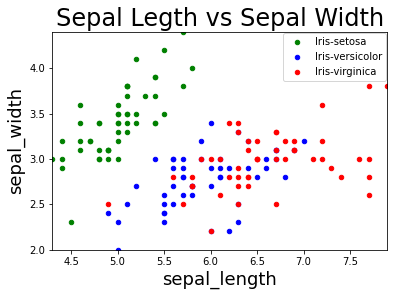

In [47]:
fig, ax = plt.subplots()

#Plot each class at a time just so we can colored legend
for g in np.unique(group):
    indexesOfGroup = np.where(group == g)
    ax.scatter(data[indexesOfGroup, 0], data[indexesOfGroup, 1], c = classdict[g], label = g, s = 20)

ax.legend( loc="upper right",      # Position of the legend
           borderaxespad=0.1)      # Add little spacing around the legend box

#plt.scatter(x=data[:,0], y=data[:,1], c=cols)
plt.title("Sepal Legth vs Sepal Width",fontsize=24)
plt.xlabel(header[0], fontsize=18)
plt.ylabel(header[1], rotation=90, fontsize=18)
plt.axis([dataframe.sepal_length.min(), dataframe.sepal_length.max(), dataframe.sepal_width.min(), dataframe.sepal_width.max()])
plt.show()

###Petal Length vs Petal Width

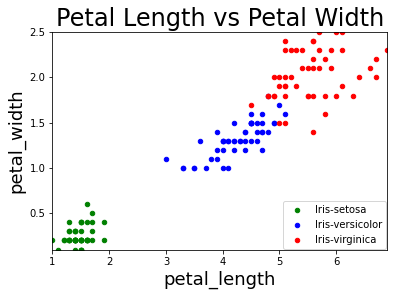

In [48]:
fig, ax = plt.subplots()

#Plot each class at a time just so we can color the legend
for g in np.unique(group):
    indexesOfGroup = np.where(group == g)
    ax.scatter(data[indexesOfGroup, 2], data[indexesOfGroup, 3], c = classdict[g], label = g, s = 20)

ax.legend( loc="lower right",      # Position of the legend
           borderaxespad=0.1)      # Add little spacing around the legend box

#plt.scatter(x=data[:,2], y=data[:,3], c=cols)
plt.title("Petal Length vs Petal Width",fontsize=24)
plt.xlabel(header[2], fontsize=18)
plt.ylabel(header[3], rotation=90, fontsize=18)
plt.axis([dataframe.petal_length.min(), dataframe.petal_length.max(), dataframe.petal_width.min(), dataframe.petal_width.max()])
plt.show()

#Linear Regresion

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

##Sepal

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data[ : , 0:1], labels, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.85      0.92        13
Iris-versicolor       0.67      0.67      0.67         9
 Iris-virginica       0.70      0.88      0.78         8

       accuracy                           0.80        30
      macro avg       0.79      0.80      0.79        30
   weighted avg       0.82      0.80      0.80        30



##Petal

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data[ : , 2:3], labels, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(r2_score(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



##Sepal and Petal

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#K-Nearest Neighbor

In [52]:
#TODO k-d tree